In [11]:
import numpy as np
from os.path import join
import pandas as pd
from itertools import combinations

#MICP is not included (only his memory perf can be used, no RT data)
PATH = '/media/1_Analyses_Intra_EM_Odor/1bis_OE_BaseSam/JPlailly201306_seeg_ALS/behavior/'
df_name = join(PATH,'episodic_individual_results_.xls')
df_save = join(PATH, 'episodic_all_su_all_trials_all_rep_old_odors.csv')
subjects = ['CHAF','LEFC','FERJ','VACJ','SEMC','PIRJ']
sel_col = ['subject_name','run_index','trial_index','odor_num','image_context','repetition_of_target',
          'context_day','score_episodic_strict','odor_recognition_rt','episodic_rt']

df_tot = pd.DataFrame([])
for su in subjects:
    df = pd.read_excel(df_name,sheet_name=su)
    df = df.loc[df['is_target']==1]
    df_sel = df[sel_col]#.dropna()
    df_tot = df_tot.append(df_sel)
#df_tot = df_tot.loc[df_tot['repetition_of_target'].isin([0,1,2])]

# Mem score = WWW*32 WWhich*4 What/WWhere*2 (Miss=0)
score_chance = {'What-S1':2,'WWhere-S1':4,'WWhich-S1':4,'WWW-S1':32,'miss':0}
#For each scenario we can create a weighted score as a function of Repetition

df_tot['epi_chance'] = df_tot['score_episodic_strict'].map(score_chance)
df_tot['epi_chance_wght'] = df_tot['epi_chance'].astype(int) / (df_tot.repetition_of_target.astype(int)+1)
df_tot.to_csv(df_save)

scores_ = ['epi_chance_wght']

dict_all = {}
for su in subjects:
    low_, high_ = [], []
    for score in scores_:
        df_ = df_tot[['subject_name','odor_num',score]]
        df_su = df_.loc[df_['subject_name']==su].groupby(['odor_num'],as_index=False).sum()
        df_su = df_su.sort_values([score], ascending=True)
        print(su,df_su)
        dict_all[su] = {str(od):round(s,3) for od,s in zip(df_su['odor_num'],df_su[score])}
        nsplit = int(df_su.shape[0] / 2)
        low_.append(df_su.index.values[:nsplit])
        high_.append(df_su.index.values[nsplit:])
        if score == 'epi_chance':
            df_ = df_tot[['subject_name','odor_num',score,'run_index']]
            #df_ = df_.loc[df_['run_index']==1]
            df_su = df_.loc[df_['subject_name']==su].groupby(['odor_num'],as_index=False).sum()
            df_su = df_su.sort_values([score], ascending=True)
            #print(su, df_su)
            nsplit = int(df_su.shape[0] / 2)
            low_.append(df_su.index.values[:nsplit])
            high_.append(df_su.index.values[nsplit:])
            #order of odors according to scores
    #diff1_l = [x for x in low_[0] if x not in low_[1]]
    #diff1_h = [x for x in high_[0] if x not in high_[1]]
    #diff2_l = [x for x in low_[0] if x not in low_[2]]
    #diff2_h = [x for x in high_[0] if x not in high_[2]]
    #print(su, 'nb of DIFFERENT odors for ALL and 1st REP',diff1_l,diff1_h)
    #print(su, 'nb of DIFFERENT odors for ALL and WEIGHTED',diff2_l,diff2_h)
print(dict_all)

CHAF    odor_num  epi_chance_wght
1         2         0.666667
0         1         3.666667
3         4         4.666667
4         5         7.333333
6         8        19.333333
5         7        30.666667
2         3        44.666667
7         9        58.666667
LEFC    odor_num  epi_chance_wght
1         2         0.000000
0         1         1.666667
6        16         1.666667
5        15         2.000000
2         3         3.333333
3         4         7.333333
7        17        30.666667
4        14        58.666667
FERJ    odor_num  epi_chance_wght
6        16         2.333333
7        17         2.333333
4        12         3.333333
3         7         3.666667
5        13         4.333333
2         5         4.666667
1         2         5.000000
0         1         5.333333
VACJ    odor_num  epi_chance_wght
1        11         1.666667
4        14         3.666667
2        12         4.000000
0        10         4.333333
7        17         6.000000
6        16        30.6

In [2]:
"""
create a dict for all odors // in terms of FAM & PLEAS
"""
PATH = '/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/1bis_OE_BaseSam/JPlailly201306_seeg_ALS/behavior/'
df = pd.read_excel(join(PATH,'Recap_Odeurs_Evaluations.xlsx'),sheet_name='Final')

dict_pleas, dict_fam = {}, {}
for i,od in enumerate(df['od_num']):
    dict_pleas[int(od[1:])] = df['Pleasantness'][i]
    dict_fam[int(od[1:])] = df['Familiarity'][i]

NameError: name 'pd' is not defined

In [168]:
from itertools import count

"""create dict of High/Low Fam & Unpl/Neutral Odors"""
odlist_su = {'CHAF': [1,5,4,7,8,9,2,3],
            'LEFC': [1,2,3,4,14,15,16,17],
            'PIRJ': [4,9,1,18,5,6,7], 
            'VACJ': [14,15,16,17,10,11,12,13],
            'SEMC': [10,11,12,13,5,7,8,9],
            'FERJ': [16,17,5,7,12,13,2,1]}

big_d = {}
for su in odlist_su:
    su_d = {}
    fam_su = [dict_fam[od] for od in odlist_su[su]]
    pls_su = [dict_pleas[od] for od in odlist_su[su]]
    su_d['low_f'] = [od for od in odlist_su[su] if dict_fam[od] < np.median(fam_su)]
    su_d['high_f'] = [od for od in odlist_su[su] if od not in su_d['low_f']]
    q_25_pl = np.quantile(pls_su,[0.25,0.75])
    su_d['neu_pl'] = [od for od in odlist_su[su] if q_25_pl[0]<dict_pleas[od]<q_25_pl[1]]
    su_d['ext_pl'] = [od for od in odlist_su[su] if od not in su_d['neu_pl']]
    big_d[su] = su_d
    del su_d
print(big_d)


{'CHAF': {'low_f': [1, 8, 9, 3], 'high_f': [5, 4, 7, 2], 'neu_pl': [5, 4, 8, 9], 'ext_pl': [1, 7, 2, 3]}, 'LEFC': {'low_f': [1, 3, 4, 14], 'high_f': [2, 15, 16, 17], 'neu_pl': [1, 4, 16, 17], 'ext_pl': [2, 3, 14, 15]}, 'PIRJ': {'low_f': [9, 1, 6], 'high_f': [4, 18, 5, 7], 'neu_pl': [4, 18, 5], 'ext_pl': [9, 1, 6, 7]}, 'VACJ': {'low_f': [14, 10, 12, 13], 'high_f': [15, 16, 17, 11], 'neu_pl': [16, 17, 10, 12], 'ext_pl': [14, 15, 11, 13]}, 'SEMC': {'low_f': [10, 12, 13, 8], 'high_f': [11, 5, 7, 9], 'neu_pl': [12, 5, 8, 9], 'ext_pl': [10, 11, 13, 7]}, 'FERJ': {'low_f': [5, 12, 13, 1], 'high_f': [16, 17, 7, 2], 'neu_pl': [16, 17, 5, 12], 'ext_pl': [7, 13, 2, 1]}}


In [1]:
"""Analysis to show difference in Pleas OR Fam as a function of Memory Richness"""
from utils import odor_groups_3wgth
import pingouin as pg

dims = [dict_pleas, dict_fam]
dims_names = ['pleasantness', 'familiarity']

n_su = len([su for su in odor_groups_3wgth])
n_conds = 3
for i,dim in enumerate(dims):
    subjects, data, conds_txt = [], [], []
    for su in odor_groups_3wgth:
        for cond in odor_groups_3wgth[su]:
            list_cond = []
            for od in odor_groups_3wgth[su][cond]:
                list_cond.append(dim[int(od)])
            data.append(np.mean(list_cond))
            subjects.append(su)
            conds_txt.append(cond)
    df = pd.DataFrame(list(zip(subjects, conds_txt, data)), 
               columns =['subj', 'cond', 'val_mean'])
    anova = pg.rm_anova(data=df, dv='val_mean', within='cond',subject='subj')
    print(anova)
    order_c = ['low','mid','high']
    mapping = {cond: i for i, cond in enumerate(order_c)}
    key = df['cond'].map(mapping)
    df = df.iloc[key.argsort()]
    df_gr = df.groupby(['cond'], sort=False).mean()
    sd_gr = df[['cond','val_mean']].groupby(['cond'], sort=False).sem().values[:,0]
    ax = df_gr.plot.bar(y='val_mean',ylim=(4,5), yerr=sd_gr,label=dims_names[i])

NameError: name 'dict_pleas' is not defined

familiarity -0.7190126096545694 0.5043241294808412
pleasantness 1.4395067670259754 0.20954553207605445


<IPython.core.display.Javascript object>


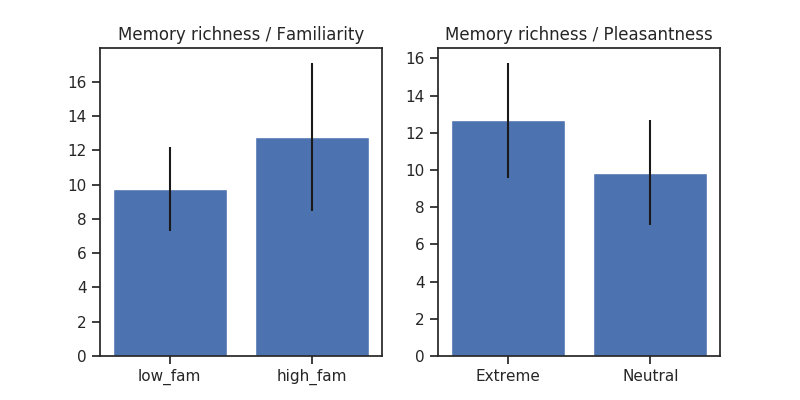

In [134]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib notebook
"""
Create groups of less and more pleasant or familiar
Look at memory richness scores
"""
PATH = '/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/1bis_OE_BaseSam/JPlailly201306_seeg_ALS/behavior/'
df_name = join(PATH,'episodic_individual_results_.xls')
df_save = join(PATH, 'episodic_all_su_all_trials_old_odors.csv')
subjects = ['CHAF','LEFC','FERJ','VACJ','SEMC','PIRJ']
sel_col = ['subject_name','run_index','trial_index','odor_num','image_context','repetition_of_target',
          'context_day','score_episodic_strict','odor_recognition_rt','episodic_rt']

fam_all, pleas_all = np.zeros((6,2)), np.zeros((6,2)) #nsubjects nconds

for s,su in enumerate(subjects):
    #create df score by subject
    df = pd.read_excel(df_name,sheet_name=su)
    df_sel = df[sel_col].dropna()
    df_sel = df_sel.loc[df_sel['repetition_of_target'].isin([0,1,2])]
    score_chance = {'What-S1':2,'WWhere-S1':4,'WWhich-S1':4,'WWW-S1':32,'miss':0}
    df_sel['epi_chance'] = df_sel['score_episodic_strict'].map(score_chance)
    df_sel['epi_chance_wght'] = df_sel['epi_chance'].astype(int) / (df_sel.repetition_of_target.astype(int)+1)
    df_ = df_sel[['subject_name','odor_num','epi_chance_wght']].groupby(['odor_num']).sum()
    df_['mem_norm'] = stats.zscore(df_['epi_chance_wght'])

    #add familiarity and pleasantness to the df
    odors = df_.index.values
    df_['fam_val'] = [dict_fam[od] for od in odors]
    df_['pleas_val'] = [dict_pleas[od] for od in odors]
    med_f, med_p = df_['fam_val'].median(), df_['pleas_val'].median()
    q_25_pl = df_['pleas_val'].quantile([0.25,0.75]).values
    df_['fam_gr'] = ['low_f' if fam < med_f else 'high_f' for fam in df_['fam_val']]
    df_['pleas_gr'] = ['mid_pl' if q_25_pl[0] < pl < q_25_pl[1] else 'ext_pl' for pl in df_['pleas_val']]
    fam_all[s,:] = df_[['epi_chance_wght','fam_gr']].groupby(['fam_gr']).mean().values[:,0]
    pleas_all[s,:] = df_[['epi_chance_wght','pleas_gr']].groupby(['pleas_gr']).mean().values[:,0]

#T-tests to compare low and high groups of Fam and Pleas
T_f, p_f = stats.ttest_rel(fam_all[:,0],fam_all[:,1])
T_p, p_p = stats.ttest_rel(pleas_all[:,0],pleas_all[:,1])
print('familiarity',T_f, p_f)
print('pleasantness',T_p, p_p)

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].bar(np.arange(2),np.mean(fam_all,axis=0),
        yerr= [stats.sem(fam_all[:,i]) for i in range(2)])
axes[0].set_title("Memory richness / Familiarity")
axes[0].set_xticks(np.arange(2))
axes[0].set_xticklabels(["low_fam","high_fam"])

axes[1].bar(np.arange(2),np.mean(pleas_all,axis=0),
        yerr= [stats.sem(pleas_all[:,i]) for i in range(2)])
axes[1].set_title("Memory richness / Pleasantness")
axes[1].set_xticks(np.arange(2))
axes[1].set_xticklabels(["Extreme","Neutral"])
plt.show()

Low Neutral -0.9555933825427625 0.38316314593909434
Neutral High 1.5907509962575923 0.17253863787973597


<IPython.core.display.Javascript object>


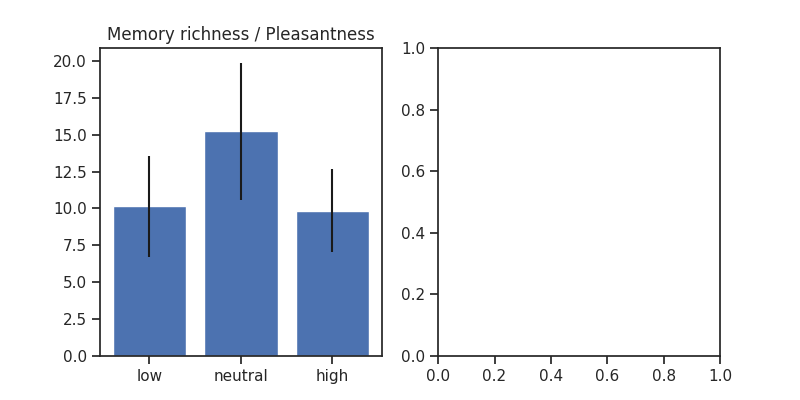

In [141]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib notebook
"""
Create groups of 3 GROUPS of PLEASANTNESS
Look at memory richness scores
"""
PATH = '/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/1bis_OE_BaseSam/JPlailly201306_seeg_ALS/behavior/'
df_name = join(PATH,'episodic_individual_results_.xls')
df_save = join(PATH, 'episodic_all_su_all_trials_old_odors.csv')
subjects = ['CHAF','LEFC','FERJ','VACJ','SEMC','PIRJ']
sel_col = ['subject_name','run_index','trial_index','odor_num','image_context','repetition_of_target',
          'context_day','score_episodic_strict','odor_recognition_rt','episodic_rt']

pleas_all = np.zeros((6,3)) #nsubjects nconds

for s,su in enumerate(subjects):
    #create df score by subject
    df = pd.read_excel(df_name,sheet_name=su)
    df_sel = df[sel_col].dropna()
    df_sel = df_sel.loc[df_sel['repetition_of_target'].isin([0,1,2])]
    score_chance = {'What-S1':2,'WWhere-S1':4,'WWhich-S1':4,'WWW-S1':32,'miss':0}
    df_sel['epi_chance'] = df_sel['score_episodic_strict'].map(score_chance)
    df_sel['epi_chance_wght'] = df_sel['epi_chance'].astype(int) / (df_sel.repetition_of_target.astype(int)+1)
    df_ = df_sel[['subject_name','odor_num','epi_chance_wght']].groupby(['odor_num']).sum()
    df_['mem_norm'] = stats.zscore(df_['epi_chance_wght'])

    #add familiarity and pleasantness to the df
    odors = df_.index.values
    df_['pleas_val'] = [dict_pleas[od] for od in odors]
    q_25_pl = df_['pleas_val'].quantile([0.25,0.75]).values
    pleas_col = []
    for pl in df_['pleas_val']:
        if q_25_pl[0] < pl < q_25_pl[1]:
            pleas_col.append('mid_pl')
        if pl < q_25_pl[0]:
            pleas_col.append('low_pl')
        if pl > q_25_pl[1]:
            pleas_col.append('high_pl')
    df_['pleas_gr'] = pleas_col
    pleas_all[s,:] = df_[['epi_chance_wght','pleas_gr']].groupby(['pleas_gr']).mean().values[:,0]

#T-tests to compare low and high groups of Fam and Pleas
T_01, p_01 = stats.ttest_rel(pleas_all[:,0],pleas_all[:,1])
T_12, p_12 = stats.ttest_rel(pleas_all[:,1],pleas_all[:,2])
print('Low Neutral',T_01, p_01)
print('Neutral High',T_12, p_12)

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].bar(np.arange(3),np.mean(pleas_all,axis=0),
        yerr= [stats.sem(pleas_all[:,i]) for i in range(3)])
axes[0].set_title("Memory richness / Pleasantness")
axes[0].set_xticks(np.arange(3))
axes[0].set_xticklabels(["low","neutral","high"])

plt.show()

In [61]:
"""
Analysis to show difference in Pleas OR Fam as a function of Memory Richness
ANALYSIS BY SUBJECT
"""
from utils import odor_groups_3wgth
import pingouin as pg

dims = [dict_pleas, dict_fam]
dims_names = ['pleasantness', 'familiarity']

for i,dim in enumerate(dims):
    data, conds_txt = [], []
    for su in odor_groups_3wgth:
        for cond in odor_groups_3wgth[su]:
            list_cond = []
            for od in odor_groups_3wgth[su][cond]:
                list_cond.append(dim[int(od)])
            data.append(np.mean(list_cond))
            conds_txt.append(cond)
        df = pd.DataFrame(list(zip(conds_txt, data)), 
               columns =['cond', 'val_mean'])
        anova = pg.anova(data=df, dv='val_mean', between='cond')
        print(su, dims_names[i])
        print(anova)

CHAF pleasantness
  Source  ddof1  ddof2  F p-unc  np2
0   cond      2      0  -     -  1.0
VACJ pleasantness
  Source  ddof1  ddof2      F    p-unc    np2
0   cond      2      3  0.147  0.86948  0.089
SEMC pleasantness
  Source  ddof1  ddof2     F     p-unc    np2
0   cond      2      6  1.07  0.400548  0.263
PIRJ pleasantness
  Source  ddof1  ddof2     F     p-unc    np2
0   cond      2      9  0.52  0.611555  0.104
LEFC pleasantness
  Source  ddof1  ddof2      F     p-unc    np2
0   cond      2     12  0.007  0.993325  0.001
FERJ pleasantness
  Source  ddof1  ddof2      F     p-unc    np2
0   cond      2     15  0.118  0.889539  0.015
CHAF familiarity
  Source  ddof1  ddof2  F p-unc  np2
0   cond      2      0  -     -  1.0
VACJ familiarity
  Source  ddof1  ddof2      F   p-unc    np2
0   cond      2      3  0.311  0.7541  0.172
SEMC familiarity
  Source  ddof1  ddof2      F     p-unc    np2
0   cond      2      6  0.212  0.814559  0.066
PIRJ familiarity
  Source  ddof1  ddof2      

/home/karim/anaconda3/envs/mne_coreg/lib/python3.6/site-packages/pingouin/parametric.py:993: RuntimeWarning: invalid value encountered in double_scalars
  mserror = sserror / ddof2


In [1]:
import numpy as np
from os.path import join
import pandas as pd
from itertools import combinations
from scipy.stats import pearsonr

#MICP is not included (only his memory perf can be used, no RT data)
PATH = '/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/1bis_OE_BaseSam/JPlailly201306_seeg_ALS/behavior/'
df_name = join(PATH,'episodic_individual_results_.xls')
df_save = join(PATH, 'episodic_all_su_all_trials_old_odors.csv')
subjects = ['CHAF','LEFC','FERJ','VACJ','SEMC','PIRJ']
sel_col = ['subject_name','run_index','trial_index','odor_num','image_context',
           'repetition_of_target','context_day','score_episodic_strict',
           'odor_recognition_rt','episodic_rt']
rec_score = {'What-S1':'Hit','WWhere-S1':'Hit','WWhich-S1':'Hit','WWW-S1':'Hit',
             'miss':'Miss'}
epi_score = {'What-S1':'Low','WWhere-S1':'Low','WWhich-S1':'High','WWW-S1':'High',
             'miss':'Low'}
epi_3gr = {'What-S1':'Mid','WWhere-S1':'Mid','WWhich-S1':'High','WWW-S1':'High',
             'miss':'Low'}


df_tot = pd.DataFrame([])
for su in subjects:
    df = pd.read_excel(df_name,sheet_name=su)
    df_sel = df[sel_col].dropna()
    df_tot = df_tot.append(df_sel)

# Mem score = WWW*32 WWhich*4 What/WWhere*2 (Miss=0)
score_chance = {'What-S1':2,'WWhere-S1':2,'WWhich-S1':4,'WWW-S1':32,'miss':0}
#For each scenario we can create a weighted score as a function of Repetition

df_tot['epi_chance'] = df_tot['score_episodic_strict'].map(score_chance)
df_tot['weights'] = df_tot['repetition_of_target'] + 1
df_tot['epi_chance_wght'] = df_tot['epi_chance'].astype(int) / df_tot.weights

df_tot['rec_RT_wght'] = df_tot['odor_recognition_rt'] / df_tot.weights
df_tot['epi_RT_wght'] = df_tot['episodic_rt'] / df_tot.weights

df['rec_score'] = df['score_episodic_strict'].map(rec_score)
df['epi_score'] = df['score_episodic_strict'].map(epi_score)
df['epi_score_3gr'] = df['score_episodic_strict'].map(epi_3gr)
df_tot['pleasantness'] = df_tot['odor_num'].map(dict_pleas)
df_tot['familiarity'] = df_tot['odor_num'].map(dict_fam)
df_tot.to_csv(df_save,index=False)

#scores_ = ['epi_chance','epi_chance_wght','epi_chance_first','rec_RT_wght',
#           'epi_RT_wght','rec_RT_first','epi_RT_first']
scores_ = ['pleasantness','familiarity']
df_mean = df_tot.groupby(['subjects_name','odor_num'])
R,p = pearsonr(df_su['pleasantness'].values,df_su['epi_chance_wght'].values)
print('pleas','R pearson',R,p)
R,p = pearsonr(df_su['familiarity'].values,df_su['epi_chance_wght'].values)
print('fam','R pearson',R,p)

for su in subjects:
    scores_values = np.array([])
    for score in scores_:
        if score == 'epi_chance':
            df_ = df_tot[['subject_name','odor_num',score]]
            df_su = df_.loc[df_['subject_name']==su].groupby(['odor_num']).sum()
        if score == 'epi_chance_wght':
            df_ = df_tot[['subject_name','odor_num',score]]
            df_su[score] = df_.loc[df_['subject_name']==su].groupby(['odor_num']).sum()
        if score == 'epi_chance_first':
            df_ = df_tot[['subject_name','odor_num','epi_chance','run_index']]
            df_ = df_.loc[df_['run_index']==1]
            df_ = df_[['subject_name','odor_num','epi_chance']]
            df_su[score] = df_.loc[df_['subject_name']==su].groupby(['odor_num']).sum()
        
        #RT weighted including miss for rec RT
        if score in ['rec_RT_wght','epi_RT_wght']:
            df_ = df_tot[['subject_name','odor_num',score]]
            df_ = df_.loc[df_[score]>0]
            df_su[score] = df_.loc[df_['subject_name']==su].groupby(['odor_num']).mean()
        #RT for the first episodic response 
        if score in ['rec_RT_first']:
            df_ = df_tot[['subject_name','odor_num',score.replace('first','wght')]]
            df_ = df_.loc[df_['subject_name']==su]
            df_su[score] = df_[['odor_num',score.replace('first','wght')]].groupby(['odor_num']).first()
        
        #RT for the first episodic response 
        if score in ['pleasantness','familiarity']:
            df_ = df_tot[['subject_name','odor_num','epi_chance_wght',score]]
            df_su = df_.loc[df_['subject_name']==su].groupby(['odor_num']).mean()
            
        if score in ['epi_RT_first']:
            df_ = df_tot.loc[df_tot['score_episodic_strict'] != 'miss']
            df_ = df_[['subject_name','odor_num',score.replace('first','wght')]]
            df_ = df_.loc[df_['subject_name']==su]
            df_su[score] = df_[['odor_num',score.replace('first','wght')]].groupby(['odor_num']).first()
            #df_su[score] = df_gr.first()
        del df_
        print(score,su,df_su[[score,'epi_chance_wght']].sort_values('epi_chance_wght',ascending=False))
        #RT = df_su['epi_RT_wght'].values[~np.isnan(df_su['epi_RT_wght'].values)]
        #score_epi = df_su['epi_chance_wght'].values[~np.isnan(df_su['epi_RT_first'].values)]
        R,p = pearsonr(df_su[score].values,df_su['epi_chance_wght'].values)
        print('R pearson',R,p)
        #print(su,df_su.sort_values('epi_chance').index.values)
        #print(su,df_su.sort_values('epi_chance_wght').index.values)
        #print(su,df_su.sort_values('epi_chance_first').index.values)


NameError: name 'dict_pleas' is not defined

### create a threshold at Retrieval to create 2 categories of High and Low performance

In [14]:
#create a score for episodic memory (Miss/What/WWhere vs WWW/WWhich)
import numpy as np
from os.path import join
import pandas as pd
from itertools import combinations

#MICP is not included (only his memory perf can be used, no RT data)
PATH = '/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/1bis_OE_BaseSam/JPlailly201306_seeg_ALS/behavior/'
df_name = join(PATH,'episodic_all_su_all_trials_old_odors.csv')

df = pd.read_csv(df_name)
rec_score = {'What-S1':'Hit','WWhere-S1':'Hit','WWhich-S1':'Hit','WWW-S1':'Hit',
             'miss':'Miss'}
epi_score = {'What-S1':'Low','WWhere-S1':'Low','WWhich-S1':'High','WWW-S1':'High',
             'miss':'Low'}
epi_3gr = {'What-S1':'Mid','WWhere-S1':'Mid','WWhich-S1':'High','WWW-S1':'High',
             'miss':'Low'}
df['rec_score'] = df['score_episodic_strict'].map(rec_score)
df['epi_score'] = df['score_episodic_strict'].map(epi_score)
df['epi_score_3gr'] = df['score_episodic_strict'].map(epi_3gr)
df_sel = df[['subject_name','epi_score_3gr','odor_num','rec_RT_wght','epi_RT_wght']]
df_gr = df_sel.groupby(['subject_name','epi_score_3gr','odor_num']).mean()
pd.set_option('display.max_rows', None)
df_gr#df.to_csv(df_name, index=False)

KeyError: "['epi_RT_wght', 'rec_RT_wght'] not in index"